In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import config
from scipy.stats.stats import ttest_ind

%matplotlib inline
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = "studentsperformance"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from studentsperformance", con=engine)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

## 1. Are the exam score variables distributed normally? If not, apply Box-Cox transformation. Does anything change?

In [4]:
from scipy.stats import boxcox

<IPython.core.display.Javascript object>

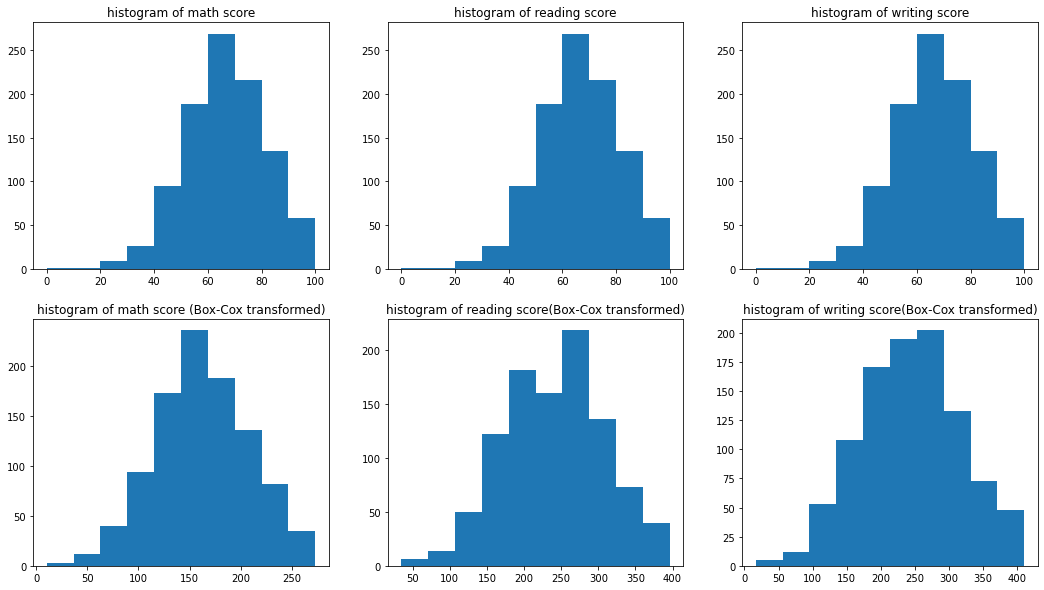

<IPython.core.display.Javascript object>

In [5]:
math_boxcox, _ = boxcox(df[df["math score"] > 0]["math score"])
reading_boxcox, _ = boxcox(df["reading score"])
writing_boxcox, _ = boxcox(df["writing score"])
plt.figure(figsize=(18, 10))

plt.subplot(231)
plt.hist(df["math score"])
plt.title("histogram of math score")

plt.subplot(232)
plt.hist(df["math score"])
plt.title("histogram of reading score")

plt.subplot(233)
plt.hist(df["math score"])
plt.title("histogram of writing score")

plt.subplot(234)
plt.hist(math_boxcox)
plt.title("histogram of math score (Box-Cox transformed)")

plt.subplot(235)
plt.hist(reading_boxcox)
plt.title("histogram of reading score(Box-Cox transformed)")

plt.subplot(236)
plt.hist(writing_boxcox)
plt.title("histogram of writing score(Box-Cox transformed)")

plt.show()

This did make them a little more normal, but a Jarque-Bera and Normality tests will be done to quantify their normality.

In [6]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(df['math score'])
norm_stats = normaltest(df['math score'])

print("Jarque-Bera test stat is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print('Normality test stat is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df['reading score'])
norm_stats = normaltest(df['reading score'])

print("Jarque-Bera test stat is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print('Normality test stat is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df['writing score'])
norm_stats = normaltest(df['writing score'])

print("Jarque-Bera test stat is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print('Normality test stat is {0} and p value is {1}'.format(norm_stats[0], norm_stats[1]))

Jarque-Bera test stat is 15.912256686712709 and p value is 0.0003505075386818213
Normality test stat is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test stat is 11.383300575987892 and p value is 0.0033740202672214448
Normality test stat is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test stat is 13.98509448257235 and p value is 0.0009187033894586527
Normality test stat is 13.606450837263859 and p value is 0.0011101885439899974


<IPython.core.display.Javascript object>

In [7]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print(
    "Jarque-Bera test stat is {0} and p value is {1}".format(jb_stats[0], jb_stats[1])
)
print(
    "Normality test stat is {0} and p value is {1}".format(norm_stats[0], norm_stats[1])
)

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print(
    "Jarque-Bera test stat is {0} and p value is {1}".format(jb_stats[0], jb_stats[1])
)
print(
    "Normality test stat is {0} and p value is {1}".format(norm_stats[0], norm_stats[1])
)

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print(
    "Jarque-Bera test stat is {0} and p value is {1}".format(jb_stats[0], jb_stats[1])
)
print(
    "Normality test stat is {0} and p value is {1}".format(norm_stats[0], norm_stats[1])
)

Jarque-Bera test stat is 1.7200982636836308 and p value is 0.42314129209599327
Normality test stat is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test stat is 4.119778573559666 and p value is 0.127468081515408
Normality test stat is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test stat is 4.746478090042761 and p value is 0.09317842784043195
Normality test stat is 6.267311355052559 and p value is 0.04355827085003712


<IPython.core.display.Javascript object>

The Box-Cox transform clearly made the distributions more normal. 

## 2. Say, we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed or not. If it's not normally distributed, apply Box-Cox transformation and check whether the transformed variable is normally distributed.

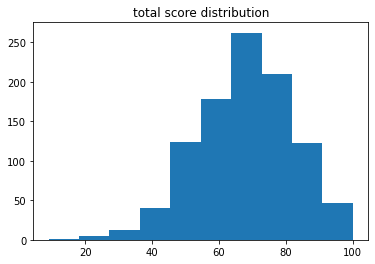

<IPython.core.display.Javascript object>

In [13]:
exam_score = (df["math score"] + df["reading score"] + df["writing score"]) / 3

plt.hist(exam_score)
plt.title("total score distribution")
plt.show()

In [14]:
jb_stats = jarque_bera(exam_score)
norm_stats = normaltest(exam_score)

print("Jarque-Bera test stat is {} and p value is {}".format(jb_stats[0], jb_stats[1]))
print(
    "Normality test stat is {} and p value is {}".format(norm_stats[0], norm_stats[1])
)

Jarque-Bera test stat is 15.453387913085168 and p value is 0.00044089934264401887
Normality test stat is 15.186721327231322 and p value is 0.0005037851534494478


<IPython.core.display.Javascript object>

The new variable, "exam_score," is not normaly distributed.

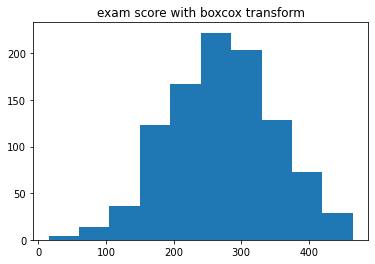

Jarque-Bera test stat is 2.4353989331279 and p value is 0.2959101356398447
Normality test stat is 2.779857602227616 and p value is 0.24909303914726724


<IPython.core.display.Javascript object>

In [15]:
exam_score_boxcox, _ = boxcox(exam_score)

plt.hist(exam_score_boxcox)
plt.title("exam score with boxcox transform")
plt.show()

jb_stats = jarque_bera(exam_score_boxcox)
norm_stats = normaltest(exam_score_boxcox)

print("Jarque-Bera test stat is {} and p value is {}".format(jb_stats[0], jb_stats[1]))
print(
    "Normality test stat is {} and p value is {}".format(norm_stats[0], norm_stats[1])
)

The new variable is now normally distributed after the Box-Cox transform, and the Jarque-Bera and Normality tests confirm this.

## 3. Which variables do seem to be related with the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of the success in the exams, which variables in our dataset might be useful?

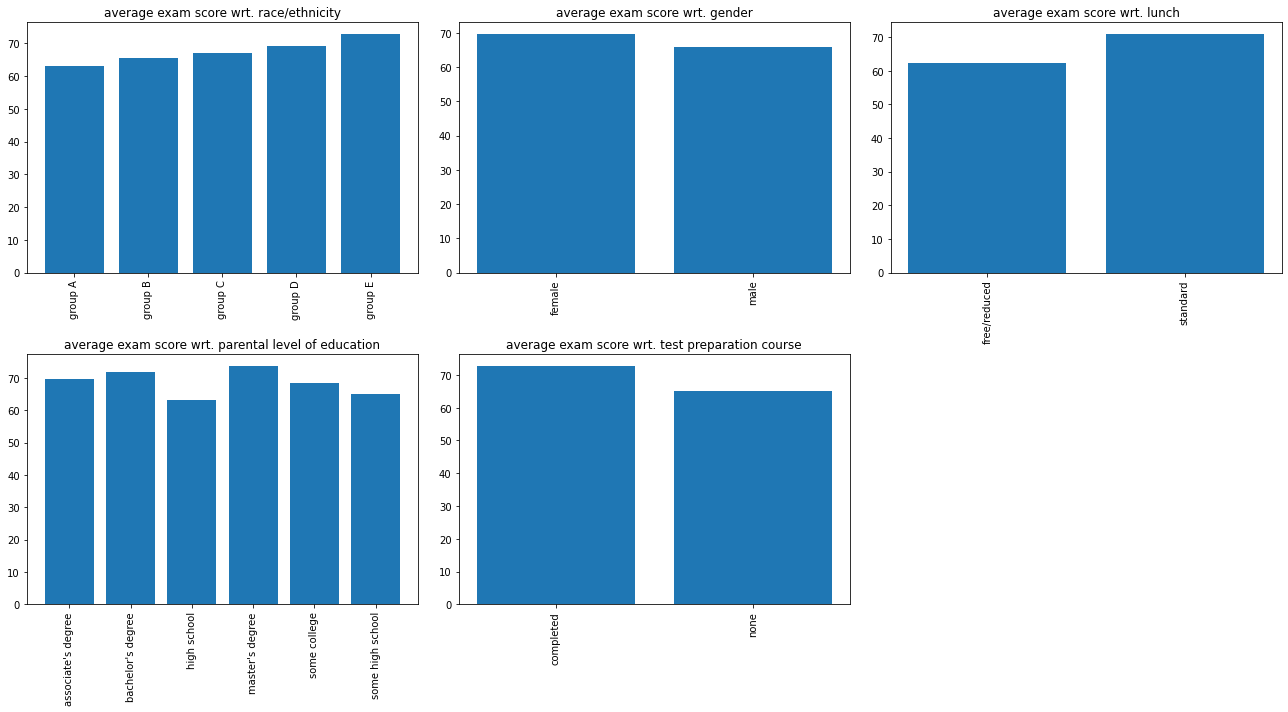

<IPython.core.display.Javascript object>

In [16]:
df['exam score'] = exam_score

plt.figure(figsize = (18,10))

plt.subplot(231)
plt.bar(df.groupby('race/ethnicity')['exam score'].mean().index, df.groupby('race/ethnicity')['exam score'].mean())
plt.title('average exam score wrt. race/ethnicity')
plt.xticks(rotation = 'vertical')

plt.subplot(232)
plt.bar(df.groupby('gender')['exam score'].mean().index, df.groupby('gender')['exam score'].mean())
plt.title('average exam score wrt. gender')
plt.xticks(rotation = 'vertical')

plt.subplot(233)
plt.bar(df.groupby('lunch')['exam score'].mean().index, df.groupby('lunch')['exam score'].mean())
plt.title('average exam score wrt. lunch')
plt.xticks(rotation = 'vertical')

plt.subplot(234)
plt.bar(df.groupby('parental level of education')['exam score'].mean().index, df.groupby('parental level of education')['exam score'].mean())
plt.title('average exam score wrt. parental level of education')
plt.xticks(rotation = 'vertical')

plt.subplot(235)
plt.bar(df.groupby('test preparation course')['exam score'].mean().index, df.groupby('test preparation course')['exam score'].mean())
plt.title('average exam score wrt. test preparation course')
plt.xticks(rotation = 'vertical')

plt.tight_layout()
plt.show()


* The average exam score in each 'race/ethnicity' group is different, and increases moving from A -> E. This may be useful
* Females score higher the males.
* Student with standard lunch score higher than free/reduced lunch. This information my be useful, but it is important to be cautious not make assumptions like (nutrition or socioeconomic standing is the reason for the difference)
* Parental education level does seem to make a difference.
* Preperation is also a determining factor.
* all of these categories may be useful in determination of success, but the lunch variable should be used with caution.

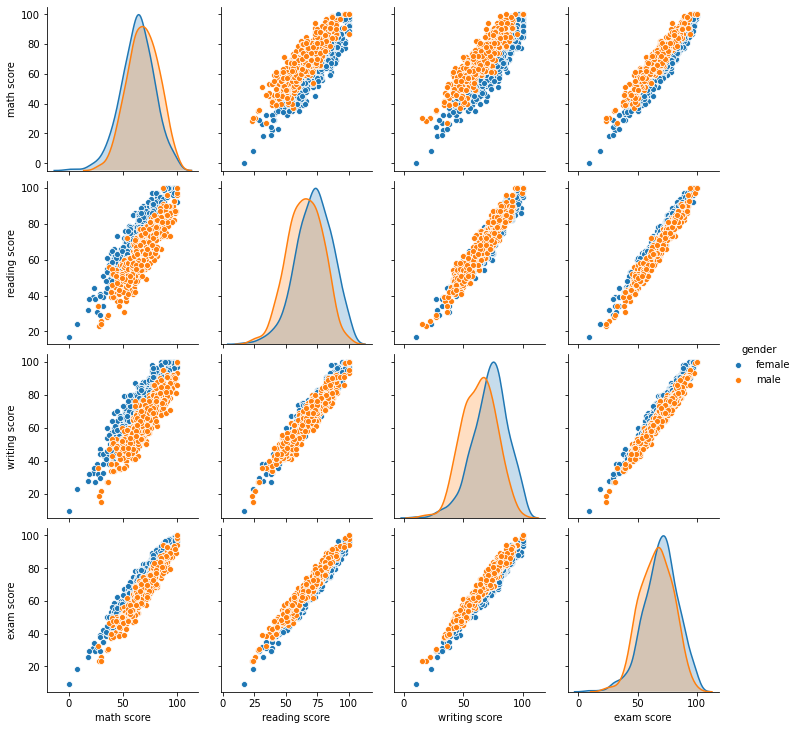

<IPython.core.display.Javascript object>

In [18]:
sns.pairplot(data=df, hue="gender")
plt.show()

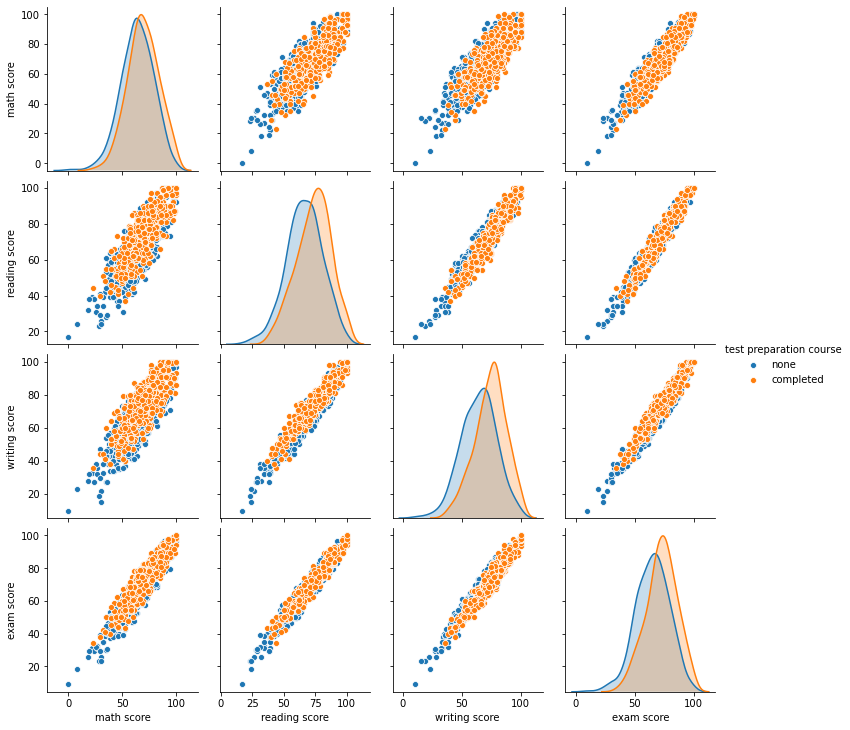

<IPython.core.display.Javascript object>

In [19]:
sns.pairplot(data=df, hue="test preparation course")
plt.show()